# Preparation

In [1]:
# This file is based on: Work_13_0_regression_acp

In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [4]:
import pandas as pd
import pyproj

In [5]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
from pathlib import Path

In [7]:
import joblib

In [8]:
from mt_function_yl_copy import *

In [9]:
import seaborn as sn

In [10]:
from scipy import stats

In [11]:
from tabulate import tabulate

In [12]:
import statsmodels.api as sm

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn


# For regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay

# For stepwise feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [14]:
from sklearn.metrics import median_absolute_error

In [15]:
# Try for documentation and version control
# pip install watermark
%load_ext watermark

In [16]:
%watermark --iversions

joblib     : 1.3.2
cv2        : 4.8.1
matplotlib : 3.7.2
statsmodels: 0.14.0
PIL        : 10.0.0
torch      : 2.0.1
numpy      : 1.26.4
pandas     : 2.0.3
sklearn    : 1.3.0
shapely    : 2.0.2
scipy      : 1.11.2
pyproj     : 3.6.1
seaborn    : 0.12.2



In [17]:
%watermark -u -d -v -m -p numpy,pandas,matplotlib,sklearn,mlxtend

Last updated: 2024-08-26

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.14.0

numpy     : 1.26.4
pandas    : 2.0.3
matplotlib: 3.7.2
sklearn   : 1.3.0
mlxtend   : 0.23.1

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.15.0-113-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit



# Data loading

In [18]:
aa = pd.read_csv('/home/yelhe/script/mt/dataraw/dfaa.csv')

In [19]:
acv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_accident.csv')
rpv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_rp.csv')

In [20]:
# same size
acv0 = acv.drop(['SV','LV','pd','svp','lvp','pdp'], axis = 1)
acv0 = acv0.assign(acp = 1)
acv0 = acv0.rename(columns = {'Nr':'id'})

In [21]:
rpv0 = rpv.drop(['speedlimit_7', 'z_qnr_34'], axis = 1)
rpv0 = rpv0.assign(acp = 0)

In [22]:
print(acv.columns.values)

['Nr' 'cp' 'ie' 'iemin' 'iemax' 'mew' 'mewmin' 'mewmax' 'meg' 'megmin'
 'megmax' 'cmean' 'cmin' 'cmax' 'dbusl' 'dtraml' 'dtrainl' 'dplight'
 'dstation' 'dparkcar' 'dparktw' 'dpedcro' 'dstopsign' 'dcurb'
 'dtrafficarea' 'droad' 'droad_sl' 'dvfpath' 'd_bicyclecount' 'd_carcount'
 'gvm_dwv' 'gvm_msp' 'gvm_asp' 'bicyclecount' 'carcount' 'r_width_value'
 'speedlimit_value' 'curbtype' 'z_qnr' 'z_knr' 'trafficarea' 'r_width'
 'r_surface' 'speedlimit' 'curbtype_1' 'curbtype_2' 'z_qnr_1' 'z_qnr_2'
 'z_qnr_3' 'z_qnr_4' 'z_qnr_5' 'z_qnr_6' 'z_qnr_7' 'z_qnr_8' 'z_qnr_9'
 'z_qnr_10' 'z_qnr_11' 'z_qnr_12' 'z_qnr_13' 'z_qnr_14' 'z_qnr_15'
 'z_qnr_16' 'z_qnr_17' 'z_qnr_18' 'z_qnr_19' 'z_qnr_20' 'z_qnr_21'
 'z_qnr_22' 'z_qnr_23' 'z_qnr_24' 'z_qnr_25' 'z_qnr_26' 'z_qnr_27'
 'z_qnr_28' 'z_qnr_29' 'z_qnr_30' 'z_qnr_31' 'z_qnr_32' 'z_qnr_33'
 'z_knr_1' 'z_knr_2' 'z_knr_3' 'z_knr_4' 'z_knr_5' 'z_knr_6' 'z_knr_7'
 'z_knr_8' 'z_knr_9' 'z_knr_10' 'z_knr_11' 'z_knr_12' 'trafficarea_1'
 'trafficarea_2' 'traffica

In [23]:
dfacrpv = pd.concat([acv0, rpv0])

In [24]:
len(dfacrpv.columns.values)

110

In [25]:
print(dfacrpv.columns.values)

['id' 'cp' 'ie' 'iemin' 'iemax' 'mew' 'mewmin' 'mewmax' 'meg' 'megmin'
 'megmax' 'cmean' 'cmin' 'cmax' 'dbusl' 'dtraml' 'dtrainl' 'dplight'
 'dstation' 'dparkcar' 'dparktw' 'dpedcro' 'dstopsign' 'dcurb'
 'dtrafficarea' 'droad' 'droad_sl' 'dvfpath' 'd_bicyclecount' 'd_carcount'
 'gvm_dwv' 'gvm_msp' 'gvm_asp' 'bicyclecount' 'carcount' 'r_width_value'
 'speedlimit_value' 'curbtype' 'z_qnr' 'z_knr' 'trafficarea' 'r_width'
 'r_surface' 'speedlimit' 'curbtype_1' 'curbtype_2' 'z_qnr_1' 'z_qnr_2'
 'z_qnr_3' 'z_qnr_4' 'z_qnr_5' 'z_qnr_6' 'z_qnr_7' 'z_qnr_8' 'z_qnr_9'
 'z_qnr_10' 'z_qnr_11' 'z_qnr_12' 'z_qnr_13' 'z_qnr_14' 'z_qnr_15'
 'z_qnr_16' 'z_qnr_17' 'z_qnr_18' 'z_qnr_19' 'z_qnr_20' 'z_qnr_21'
 'z_qnr_22' 'z_qnr_23' 'z_qnr_24' 'z_qnr_25' 'z_qnr_26' 'z_qnr_27'
 'z_qnr_28' 'z_qnr_29' 'z_qnr_30' 'z_qnr_31' 'z_qnr_32' 'z_qnr_33'
 'z_knr_1' 'z_knr_2' 'z_knr_3' 'z_knr_4' 'z_knr_5' 'z_knr_6' 'z_knr_7'
 'z_knr_8' 'z_knr_9' 'z_knr_10' 'z_knr_11' 'z_knr_12' 'trafficarea_1'
 'trafficarea_2' 'traffica

In [26]:
# dfacrpv.to_csv('/home/yelhe/script/mt/model/dfacrpv.csv', index = False)

In [27]:
dfacrpv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1087 entries, 0 to 791
Columns: 110 entries, id to acp
dtypes: float64(36), int64(72), object(2)
memory usage: 942.6+ KB


In [28]:
dfacrpv['r_surface'].unique()

array(['Hart', 'Natur'], dtype=object)

In [29]:
dfacrpv.groupby(['speedlimit_4']).size()

speedlimit_4
0    895
1    192
dtype: int64

In [30]:
# droad_sl  'd_bicyclecount' 'd_carcount' 'curbtype'   'z_qnr' 'z_knr'  'trafficarea'
# 'r_width''r_surface' 'speedlimit'

In [31]:
dfacrpv.shape

(1087, 110)

In [32]:
cn = ['cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 
      'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 
      'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb',
      'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
      'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5',
      'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13',
      'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
      'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
       'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'carcount']

# Remove id, droad_sl ,'d_bicyclecount' 'd_carcount' 'curbtype'  
# 'z_qnr' 'z_knr'  'trafficarea'
# 'r_width''r_surface' 'speedlimit'

In [33]:
y = dfacrpv['acp']
x = dfacrpv[cn]

In [34]:
x.shape

(1087, 98)

In [35]:
# 1087 points with 98 features in total

# Step wise feature selection

## Ordinary Least Squares Regression model

### Sequential floating forward selection

In [118]:
# Find the best size

# Scoring = neg_mean_squared_error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 2,
#                                 scoring='neg_mean_squared_error',
#                                 cv=25,
#                                 n_jobs = -1
#                                )
# selected_features8 = sfs.fit(x, y)

# Scoring = r2
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='r2',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features10 = sfs.fit(x, y)

# # # Scoring = median absolute error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='neg_median_absolute_error',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features13 = sfs.fit(x, y)

# # Scoring = mean absolute error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='neg_mean_absolute_error',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features16 = sfs.fit(x, y)


In [51]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 5
# print(selected_features.k_feature_names_)
# print(len(selected_features.k_feature_names_))
# print(selected_features.k_score_)
# # 26

('cp', 'cmean', 'dstopsign', 'dvfpath', 'r_width_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_18', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_knr_8', 'z_knr_9', 'trafficarea_2', 'r_width_2', 'r_width_4', 'r_width_6', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'carcount')
-0.12571681174275004


In [108]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 10
# print(selected_features4.k_feature_names_)
# print(len(selected_features4.k_feature_names_))
# print(selected_features4.k_score_)
# 31

('cp', 'cmax', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_5', 'z_qnr_23', 'z_qnr_25', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6', 'bicyclecount')
31
-0.10480516924101084


In [118]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 15
# print(selected_features6.k_feature_names_)
# print(len(selected_features6.k_feature_names_))
# print(selected_features6.k_score_)
# # 34

('cp', 'iemin', 'mew', 'cmin', 'cmax', 'dcurb', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_10', 'z_qnr_15', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_8', 'z_knr_11', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
34
-0.10202048337733939


In [123]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 20
# print(selected_features7.k_feature_names_)
# print(len(selected_features7.k_feature_names_))
# print(selected_features7.k_score_)
# 37

('cp', 'iemin', 'cmin', 'cmax', 'dcurb', 'dtrafficarea', 'gvm_msp', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_2', 'z_qnr_4', 'z_qnr_5', 'z_qnr_7', 'z_qnr_9', 'z_qnr_15', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_31', 'z_knr_2', 'z_knr_8', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_5', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
37
-0.09881583948361942


In [129]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 25
# print(selected_features8.k_feature_names_)
# print(len(selected_features8.k_feature_names_))
# print(selected_features8.k_score_)
#54

('cp', 'iemin', 'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 'dplight', 'dstation', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_13', 'z_qnr_15', 'z_qnr_18', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_5', 'z_knr_8', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_4', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')
54
-0.09597409350628204


In [37]:
# # n = best, linear regression, scoring = r2, cv = 5
# print(selected_features1.k_feature_names_)
# print(len(selected_features1.k_feature_names_))
# print(selected_features1.k_score_)
# # 63

('cp', 'ie', 'iemin', 'mew', 'mewmin', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dstation', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_8', 'z_qnr_10', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_19', 'z_qnr_23', 'z_qnr_26', 'z_qnr_27', 'z_qnr_30', 'z_qnr_31', 'z_knr_3', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_9', 'trafficarea_1', 'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'carcount')
63
0.11798916939950357


In [42]:
# # # n = best, linear regression, scoring = r2, cv = 10
# print(selected_features5.k_feature_names_)
# print(len(selected_features5.k_feature_names_))
# print(selected_features5.k_score_)
# # 84

('cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'meg', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_17', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_23', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_knr_1', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'c

In [47]:
# # # n = best, linear regression, scoring = r2, cv = 15
# print(selected_features9.k_feature_names_)
# print(len(selected_features9.k_feature_names_))
# print(selected_features9.k_score_)
# # 59

('cp', 'ie', 'iemax', 'mewmin', 'meg', 'megmin', 'megmax', 'cmin', 'dbusl', 'dtraml', 'dtrainl', 'dstation', 'dparkcar', 'dcurb', 'dtrafficarea', 'gvm_asp', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_8', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_24', 'z_qnr_25', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_4', 'speedlimit_5', 'carcount')
59
0.02927208794487847


In [52]:
# # # n = best, linear regression, scoring = r2, cv = 20
# print(selected_features10.k_feature_names_)
# print(len(selected_features10.k_feature_names_))
# print(selected_features10.k_score_)
# # 73

('ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_27', 'z_qnr_30', 'z_qnr_31', 'z_knr_1', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_2', 'r_width_3', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')
73
0.03566532407488141


In [57]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 5
# print(selected_features2.k_feature_names_)
# print(len(selected_features2.k_feature_names_))
# print(selected_features2.k_score_)
# #21

('z_qnr_7', 'z_qnr_8', 'z_qnr_12', 'z_qnr_19', 'z_qnr_22', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_knr_5', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_4', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
21
-0.154296875


In [63]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 10
# print(selected_features11.k_feature_names_)
# print(len(selected_features11.k_feature_names_))
# print(selected_features11.k_score_)
# # 16

('z_qnr_2', 'z_qnr_5', 'z_qnr_11', 'z_qnr_20', 'z_qnr_22', 'z_qnr_28', 'z_qnr_30', 'z_qnr_33', 'z_knr_4', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_6', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
16
-0.1231201171875


In [70]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 15
# print(selected_features12.k_feature_names_)
# print(len(selected_features12.k_feature_names_))
# print(selected_features12.k_score_)
# 21

('z_qnr_1', 'z_qnr_5', 'z_qnr_7', 'z_qnr_8', 'z_qnr_16', 'z_qnr_19', 'z_qnr_20', 'z_qnr_22', 'z_qnr_23', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_qnr_32', 'z_knr_9', 'z_knr_12', 'trafficarea_3', 'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
21
-0.1470978846351567


In [75]:
# # n = best, linear regression, scoring = neg median absolute error, cv = 20
# print(selected_features13.k_feature_names_)
# print(len(selected_features13.k_feature_names_))
# print(selected_features13.k_score_)
# # 11

('z_qnr_7', 'z_qnr_20', 'z_knr_7', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
11
-0.1203094482421875


In [80]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 5
# print(selected_features3.k_feature_names_)
# print(len(selected_features3.k_feature_names_))
# print(selected_features3.k_score_)
# # 24

('cp', 'cmean', 'cmax', 'dparkcar', 'dstopsign', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_2', 'z_qnr_3', 'trafficarea_2', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')
24
-0.2746913055917502


In [85]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 10
# print(selected_features14.k_feature_names_)
# print(len(selected_features14.k_feature_names_))
# print(selected_features14.k_score_)
# # 28

('iemax', 'cmin', 'dplight', 'droad', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_33', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')
28
-0.2319993756956884


In [90]:
# # n = best, linear regression, scoring = neg mean absolute error, cv = 15
# print(selected_features15.k_feature_names_)
# print(len(selected_features15.k_feature_names_))
# print(selected_features15.k_score_)
# # 24

('dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_7', 'z_qnr_12', 'z_qnr_22', 'z_qnr_26', 'z_qnr_33', 'trafficarea_2', 'trafficarea_3', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
24
-0.225972745204969


In [95]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 20
# print(selected_features16.k_feature_names_)
# print(len(selected_features16.k_feature_names_))
# print(selected_features16.k_score_)
# # 22

('cp', 'cmax', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_7', 'z_qnr_12', 'z_qnr_23', 'z_qnr_31', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'r_surface_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')
22
-0.22486531300698415


In [99]:
df03 = pd.DataFrame.from_dict(selected_features3.get_metric_dict()).T

In [100]:
df03.head(10)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(93,)","[-0.6277228739650328, -0.2805621513690522, -0....",-0.308916,"(speedlimit_4,)",0.207701,0.161598,0.080799
2,"(92, 93)","[-0.6176246676905953, -0.2738056079710613, -0....",-0.293278,"(speedlimit_3, speedlimit_4)",0.212585,0.165398,0.082699
3,"(79, 92, 93)","[-0.5926592571466698, -0.27374709513607726, -0...",-0.289443,"(trafficarea_2, speedlimit_3, speedlimit_4)",0.199044,0.154863,0.077431
4,"(79, 84, 92, 93)","[-0.5844006866079063, -0.2788079548636461, -0....",-0.286587,"(trafficarea_2, r_width_4, speedlimit_3, speed...",0.196492,0.152877,0.076439
5,"(23, 79, 84, 92, 93)","[-0.5752839339293545, -0.27689071316763425, -0...",-0.285257,"(dtrafficarea, trafficarea_2, r_width_4, speed...",0.191239,0.14879,0.074395
6,"(23, 79, 84, 88, 92, 93)","[-0.5661389231323987, -0.2730666966621773, -0....",-0.283814,"(dtrafficarea, trafficarea_2, r_width_4, r_sur...",0.185824,0.144577,0.072289
7,"(23, 79, 84, 88, 92, 93, 94)","[-0.562952008055906, -0.2737815569187688, -0.1...",-0.282357,"(dtrafficarea, trafficarea_2, r_width_4, r_sur...",0.18501,0.143944,0.071972
8,"(23, 79, 84, 88, 92, 93, 94, 95)","[-0.5624035538328788, -0.27771008579418505, -0...",-0.281865,"(dtrafficarea, trafficarea_2, r_width_4, r_sur...",0.185606,0.144408,0.072204
9,"(23, 79, 84, 85, 88, 92, 93, 94, 95)","[-0.5562117121673993, -0.2808433872637015, -0....",-0.281414,"(dtrafficarea, trafficarea_2, r_width_4, r_wid...",0.18247,0.141968,0.070984
10,"(23, 30, 79, 84, 85, 88, 92, 93, 94, 95)","[-0.558993447116511, -0.2712610262033093, -0.2...",-0.280703,"(dtrafficarea, speedlimit_value, trafficarea_2...",0.183822,0.14302,0.07151


In [101]:
# # Feature selection - linear regression - neg mean squared error
# df03.to_csv('/home/yelhe/script/mtp/tables/fs_lr_nmae_mismean.csv', index = False)

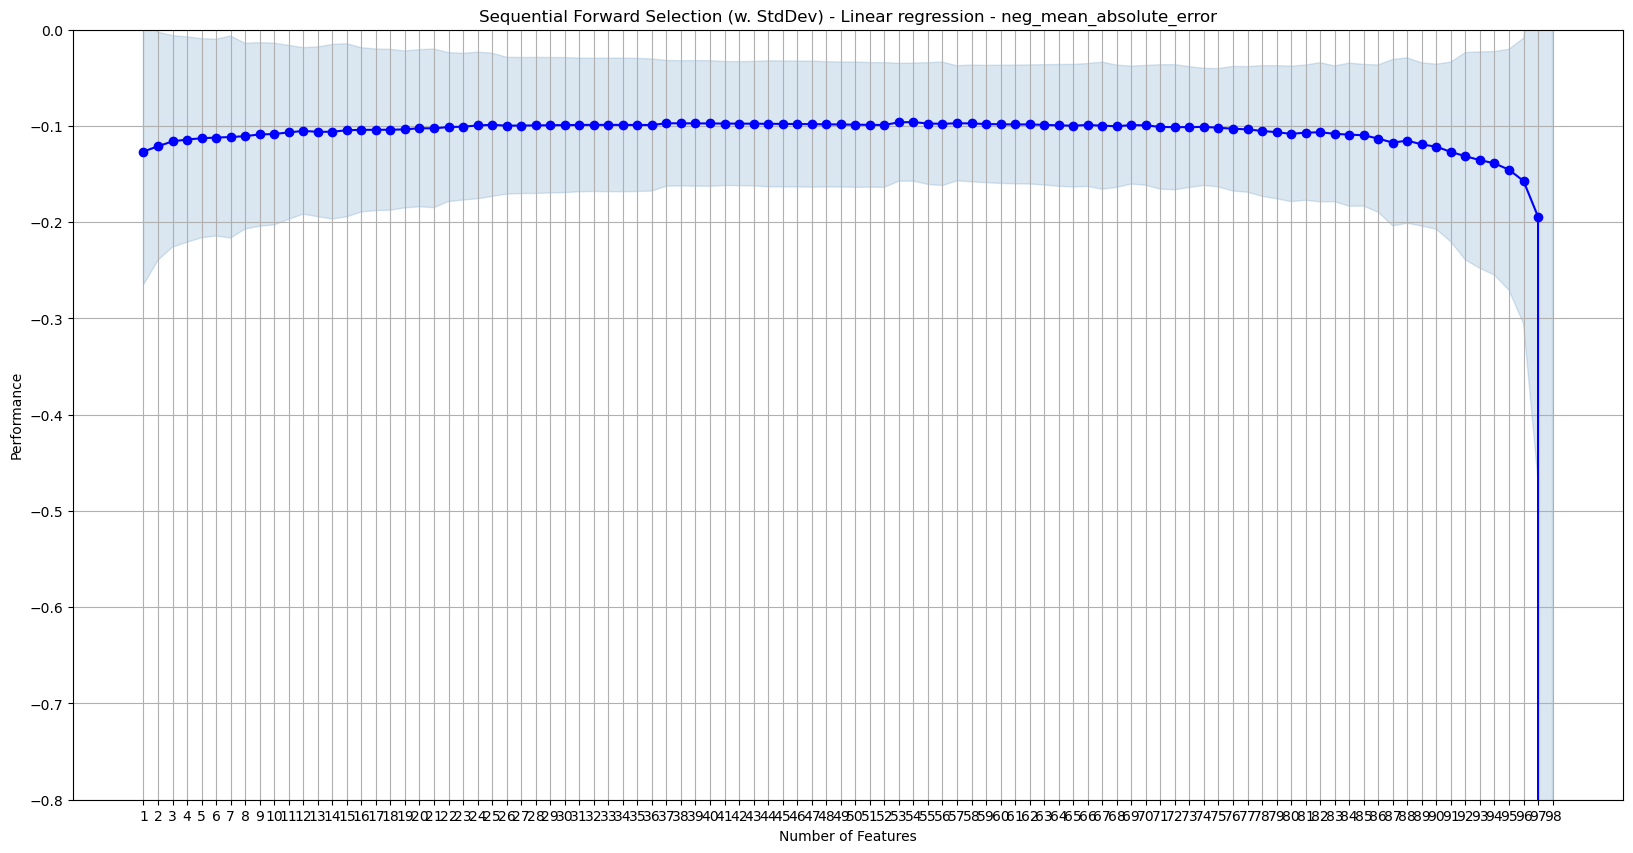

In [130]:
fig3 = plot_sfs(selected_features8.get_metric_dict(), figsize = (20,10), kind='std_dev')

plt.ylim([-0.8, 0])
plt.title('Sequential Forward Selection (w. StdDev) - Linear regression - neg_mean_absolute_error')
plt.grid()
plt.show()

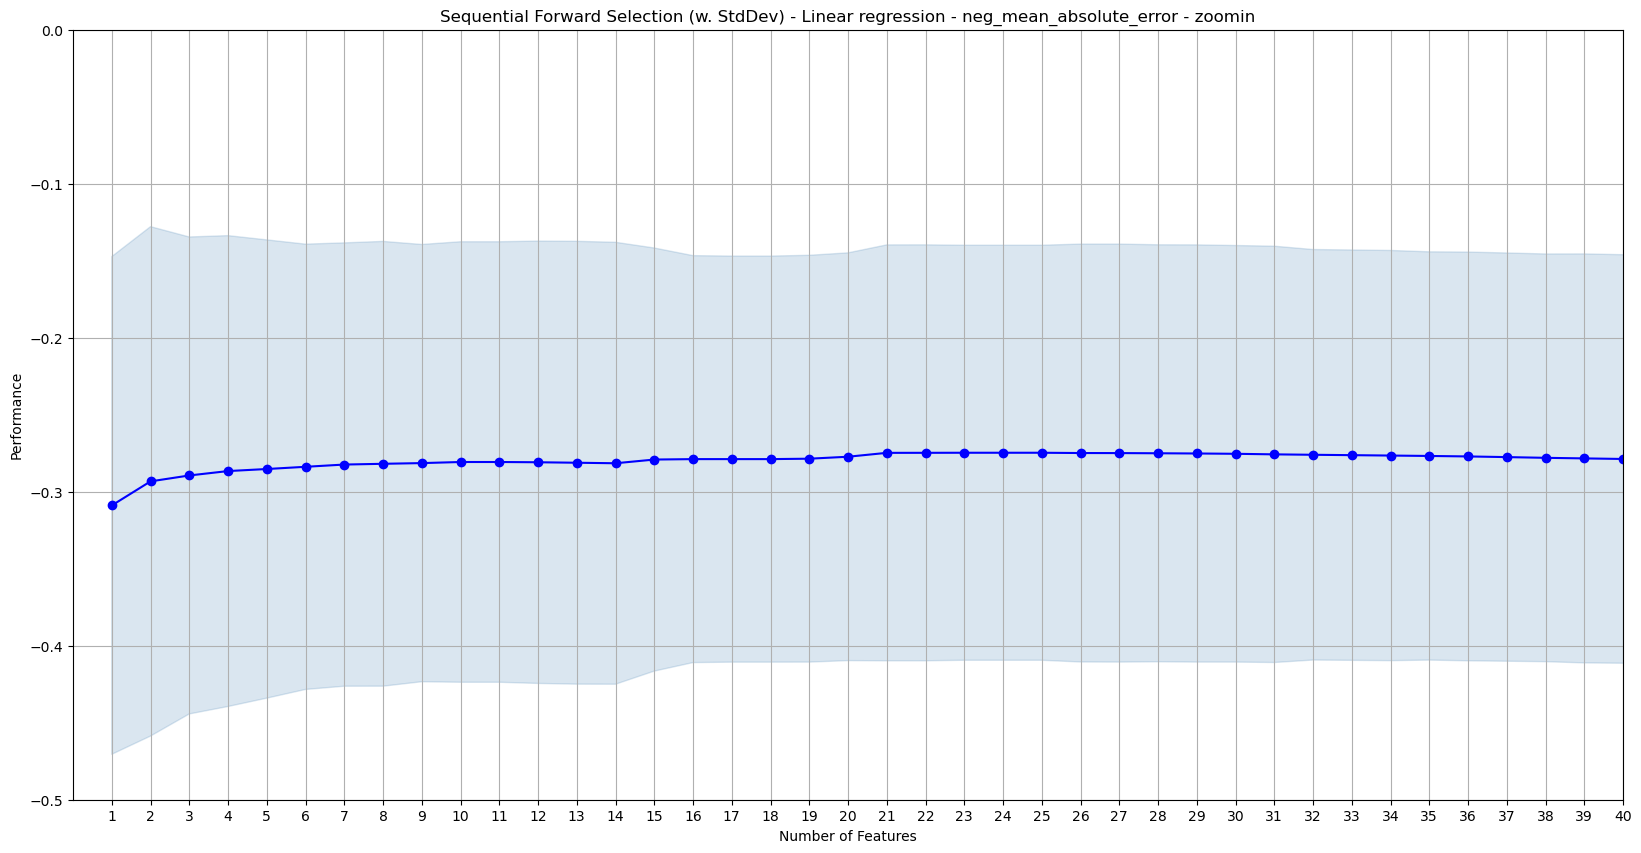

In [105]:
fig2 = plot_sfs(selected_features3.get_metric_dict(), figsize = (20,10), kind='std_dev')

plt.ylim([-0.5, 0])
plt.xlim([0,40])
plt.title('Sequential Forward Selection (w. StdDev) - Linear regression - neg_mean_absolute_error - zoomin')
plt.grid()
# plt.figure(figsize = (15,10))
plt.show()

In [110]:
l0 = ('cp', 'cmean', 'dstopsign', 'dvfpath', 'r_width_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_18', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_knr_8', 'z_knr_9', 'trafficarea_2', 'r_width_2', 'r_width_4', 'r_width_6', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'carcount')
l1 = ('cp', 'cmax', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_5', 'z_qnr_23', 'z_qnr_25', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6', 'bicyclecount')
l2 = ('cp', 'iemin', 'mew', 'cmin', 'cmax', 'dcurb', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_10', 'z_qnr_15', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_8', 'z_knr_11', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
l3 = ('cp', 'iemin', 'cmin', 'cmax', 'dcurb', 'dtrafficarea', 'gvm_msp', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_2', 'z_qnr_4', 'z_qnr_5', 'z_qnr_7', 'z_qnr_9', 'z_qnr_15', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_31', 'z_knr_2', 'z_knr_8', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_5', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
l4 = ('cp', 'iemin', 'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 'dplight', 'dstation', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_13', 'z_qnr_15', 'z_qnr_18', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_5', 'z_knr_8', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_4', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')


In [111]:
selected_columns_linr_sffs = []
selected_columns_linr_sffs = {'nmse_cv5':list(l0), 
                              'nmse_cv10':list(l1), 
                              'nmse_cv15':list(l2), 
                              'nmse_cv20':list(l3), 
                              'nmse_cv25':list(l4),
                              'r2_cv5':list(selected_features1.k_feature_names_), 
                              'r2_cv10':list(selected_features5.k_feature_names_), 
                              'r2_cv15':list(selected_features9.k_feature_names_), 
                              'r2_cv20':list(selected_features10.k_feature_names_), 
                              'nmedae_cv5':list(selected_features2.k_feature_names_), 
                              'nmedae_cv10':list(selected_features11.k_feature_names_), 
                              'nmedae_cv15':list(selected_features12.k_feature_names_), 
                              'nmedae_cv20':list(selected_features13.k_feature_names_), 
                              'nmeae_cv5':list(selected_features3.k_feature_names_), 
                              'nmeae_cv10':list(selected_features14.k_feature_names_), 
                              'nmeae_cv15':list(selected_features15.k_feature_names_), 
                              'nmeae_cv20':list(selected_features16.k_feature_names_)}

In [116]:
df_sf_linr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sffs.items()]))

In [117]:
df_sf_linr_sffs.to_csv('/home/yelhe/script/mtp/tables/sffs_linearreg.csv', index = True)

In [ ]:
df_sf_linr_sffs

In [96]:
selected_columns = list(selected_features16.k_feature_names_)
# selected_columns

# selected_features: linear regression, neg_mean_squared_error, cv = 5
# selected_features4: linear regression, neg_mean_squared_error, cv = 10
# selected_features6: linear regression, neg_mean_squared_error, cv = 15
# selected_features7: linear regression, neg_mean_squared_error, cv = 20
# selected_features8: linear regression, neg_mean_squared_error, cv = 25
# selected_features1: linear regression, r2, cv = 5
# selected_features5: linear regression, r2, cv = 10
# selected_features9: linear regression, r2, cv = 15
# selected_features10: linear regression, r2, cv = 20
# selected_features2: linear regression, neg_median_absolute_error, cv = 5
# selected_features11: linear regression, neg_median_absolute_error, cv = 10
# selected_features12: linear regression, neg_median_absolute_error, cv = 15
# selected_features13: linear regression, neg_median_absolute_error, cv = 20
# selected_features3: linear regression, neg_mean_absolute_error, cv = 5
# selected_features14: linear regression, neg_mean_absolute_error, cv = 10
# selected_features15: linear regression, neg_mean_absolute_error, cv = 15
# selected_features16: linear regression, neg_mean_absolute_error, cv = 20

In [97]:
# OLS
df_selected = dfacrpv[selected_columns]
 
X_train, X_test, y_train, y_test = train_test_split(
        df_selected, y,
        test_size=0.3,
        random_state=0)

m0 = sm.OLS(y_train, X_train)
r0 = m0.fit()

In [98]:
r0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     47.84
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.19e-118
Time:                        20:27:24   Log-Likelihood:                -161.80
No. Observations:                 760   AIC:                             365.6
Df Residuals:                     739   BIC:                             462.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                  -0.3085      0.066     -4.673      0.000      -0.438      -0.179
cmax                 0.1465      0.033      4.502      0.000       0.083       0.210
r_width_value       -0.0939      0.022     -4.192      0.000      -0.138      -0.050
speedlimit_value    -0.0830      0.014     -6.130      0.000      -0.110      -0.056
curbtype_1           0.0829      0.035      2.348      0.019       0.014       0.152
curbtype_2          -0.0341      0.035     -0.972      0.331      -0.103       0.035
z_qnr_7              0.2796      0.078      3.562      0.000       0.125       0.434
z_qnr_12             0.1321      0.050      2.631      0.009       0.034       0.231
z_qnr_23            -0.1867      0.082     -2.273      0.023      -0.348      -0.025
z_qnr_31            -0.1418      0.098     -1.445      0.149      -0.334       0.051
z_knr_4              0.1725      0.040      4.303      0.000       0.094       0.251
z_knr_9              0.1697      0.039      4.362      0.000       0.093       0.246
trafficarea_2       -0.2575      0.043     -5.988      0.000      -0.342      -0.173
r_width_3            0.1505      0.055      2.760      0.006       0.043       0.258
r_width_4            0.1900      0.041      4.688      0.000       0.110       0.270
r_width_5            0.1903      0.043      4.405      0.000       0.106       0.275
r_width_6            0.1494      0.050      2.999      0.003       0.052       0.247
r_surface_1          0.1758      0.030      5.859      0.000       0.117       0.235
r_surface_2         -0.1269      0.069     -1.829      0.068      -0.263       0.009
speedlimit_4         0.6891      0.034     20.566      0.000       0.623       0.755
speedlimit_5         0.1003      0.092      1.094      0.274      -0.080       0.280
speedlimit_6         0.4561      0.106      4.313      0.000       0.248       0.664
==============================================================================
Omnibus:                      105.134   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.910
Skew:                           0.877   Prob(JB):                     2.33e-39
Kurtosis:                       4.594   Cond. No.                     8.27e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.49e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [103]:
# sm.graphics.influence_plot(r0)
# plt.show()

### Sequential floating backward selection

In [ ]:
# Find the best size

# Scoring = neg_mean_squared_error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 2,
#                                 scoring='neg_mean_squared_error',
#                                 cv=25,
#                                 n_jobs = -1
#                                )
# selected_features8 = sfs.fit(x, y)

# Scoring = r2
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='r2',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features10 = sfs.fit(x, y)

# # # Scoring = median absolute error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='neg_median_absolute_error',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features13 = sfs.fit(x, y)

# # Scoring = mean absolute error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='neg_mean_absolute_error',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features16 = sfs.fit(x, y)


## Logistic Regression model

In [ ]:
# Find the best size

# # Scoring = neg_mean_squared_error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 2,
#                                 scoring='neg_mean_squared_error',
#                                 cv=10,
#                                 n_jobs = -1
#                                )
# selected_features4 = sfs.fit(x, y)

# Scoring = r2
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='r2',
#                                 cv=5,
#                                 n_jobs = -1
#                                )
# selected_features1 = sfs.fit(x, y)

# # Scoring = median absolute error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='neg_median_absolute_error',
#                                 cv=5,
#                                 n_jobs = -1
#                                )
# selected_features2 = sfs.fit(x, y)

# # Scoring = mean absolute error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='neg_mean_absolute_error',
#                                 cv=5,
#                                 n_jobs = -1
#                                )
# selected_features3 = sfs.fit(x, y)


In [92]:
n = 25
sfs_log = SequentialFeatureSelector(linear_model.LogisticRegression(),
                                k_features=n,
                                forward=True,
                                scoring='r2'
                                # ,cv=None default = 5
                               )
selected_features_log = sfs_log.fit(x, y)

In [93]:
# n = 25 logistic regression
print(selected_features_log.k_feature_names_)
print(selected_features_log.k_score_)

('cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'dvfpath', 'curbtype_1', 'curbtype_2', 'z_qnr_2', 'z_qnr_4', 'z_qnr_6', 'z_qnr_16', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_knr_9', 'trafficarea_2', 'speedlimit_4')
0.33005563359281287


In [94]:
selected_columns_log = list(selected_features_log.k_feature_names_)
selected_columns_log

['cp',
 'ie',
 'iemin',
 'iemax',
 'mew',
 'mewmin',
 'mewmax',
 'meg',
 'megmin',
 'megmax',
 'cmean',
 'dvfpath',
 'curbtype_1',
 'curbtype_2',
 'z_qnr_2',
 'z_qnr_4',
 'z_qnr_6',
 'z_qnr_16',
 'z_qnr_23',
 'z_qnr_24',
 'z_qnr_25',
 'z_qnr_26',
 'z_knr_9',
 'trafficarea_2',
 'speedlimit_4']

In [99]:
# linear_model.LogisticRegression()
df_selected_log = dfacrpv[selected_columns_log]
 
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
        df_selected_log, y,
        test_size=0.3,
        random_state=1)

m1_log = sm.Logit(y_train_log, X_train_log)
r1_log = m1_log.fit()

Optimization terminated successfully.
         Current function value: 0.336274
         Iterations 7


In [100]:
m1_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  760
Model:                          Logit   Df Residuals:                      735
Method:                           MLE   Df Model:                           24
Date:                Mon, 29 Jul 2024   Pseudo R-squ.:                  0.4245
Time:                        16:05:06   Log-Likelihood:                -255.57
converged:                       True   LL-Null:                       -444.07
Covariance Type:            nonrobust   LLR p-value:                 3.872e-65
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
cp               -2.9479      0.636     -4.632      0.000      -4.195      -1.701
ie                0.9325      1.125      0.829      0.407      -1.273       3.138
iemin            -0.7073      0.722     -0.980      0.327      -2.122       0.707
iemax            -0.3344      0.527     -0.634      0.526      -1.368       0.699
mew               0.2486      0.430      0.577      0.564      -0.595       1.092
mewmin           -0.1365      0.278     -0.491      0.623      -0.682       0.409
mewmax            0.0740      0.263      0.282      0.778      -0.441       0.589
meg               0.1008      0.400      0.252      0.801      -0.684       0.886
megmin           -0.1863      0.285     -0.655      0.513      -0.744       0.371
megmax           -0.0738      0.224     -0.329      0.742      -0.513       0.365
cmean             1.3303      0.300      4.436      0.000       0.742       1.918
dvfpath          -0.1382      0.141     -0.977      0.329      -0.415       0.139
curbtype_1        0.1435      0.356      0.403      0.687      -0.554       0.841
curbtype_2       -1.2452      0.402     -3.100      0.002      -2.032      -0.458
z_qnr_2           0.8572      0.653      1.314      0.189      -0.422       2.136
z_qnr_4          -1.4026      1.055     -1.330      0.184      -3.469       0.664
z_qnr_6           0.6214      0.740      0.840      0.401      -0.829       2.071
z_qnr_16          0.9033      0.978      0.924      0.356      -1.013       2.819
z_qnr_23         -2.1677      1.111     -1.952      0.051      -4.345       0.009
z_qnr_24         -0.8401      0.696     -1.207      0.227      -2.204       0.524
z_qnr_25         -1.5154      0.741     -2.044      0.041      -2.968      -0.062
z_qnr_26         -0.0612      1.007     -0.061      0.952      -2.035       1.912
z_knr_9           1.2728      0.369      3.446      0.001       0.549       1.997
trafficarea_2    -1.2853      0.500     -2.570      0.010      -2.266      -0.305
speedlimit_4      4.4486      0.414     10.755      0.000       3.638       5.259
=================================================================================
"""

# Correlation analysis

In [120]:
dfv = dfacrpv[cn]

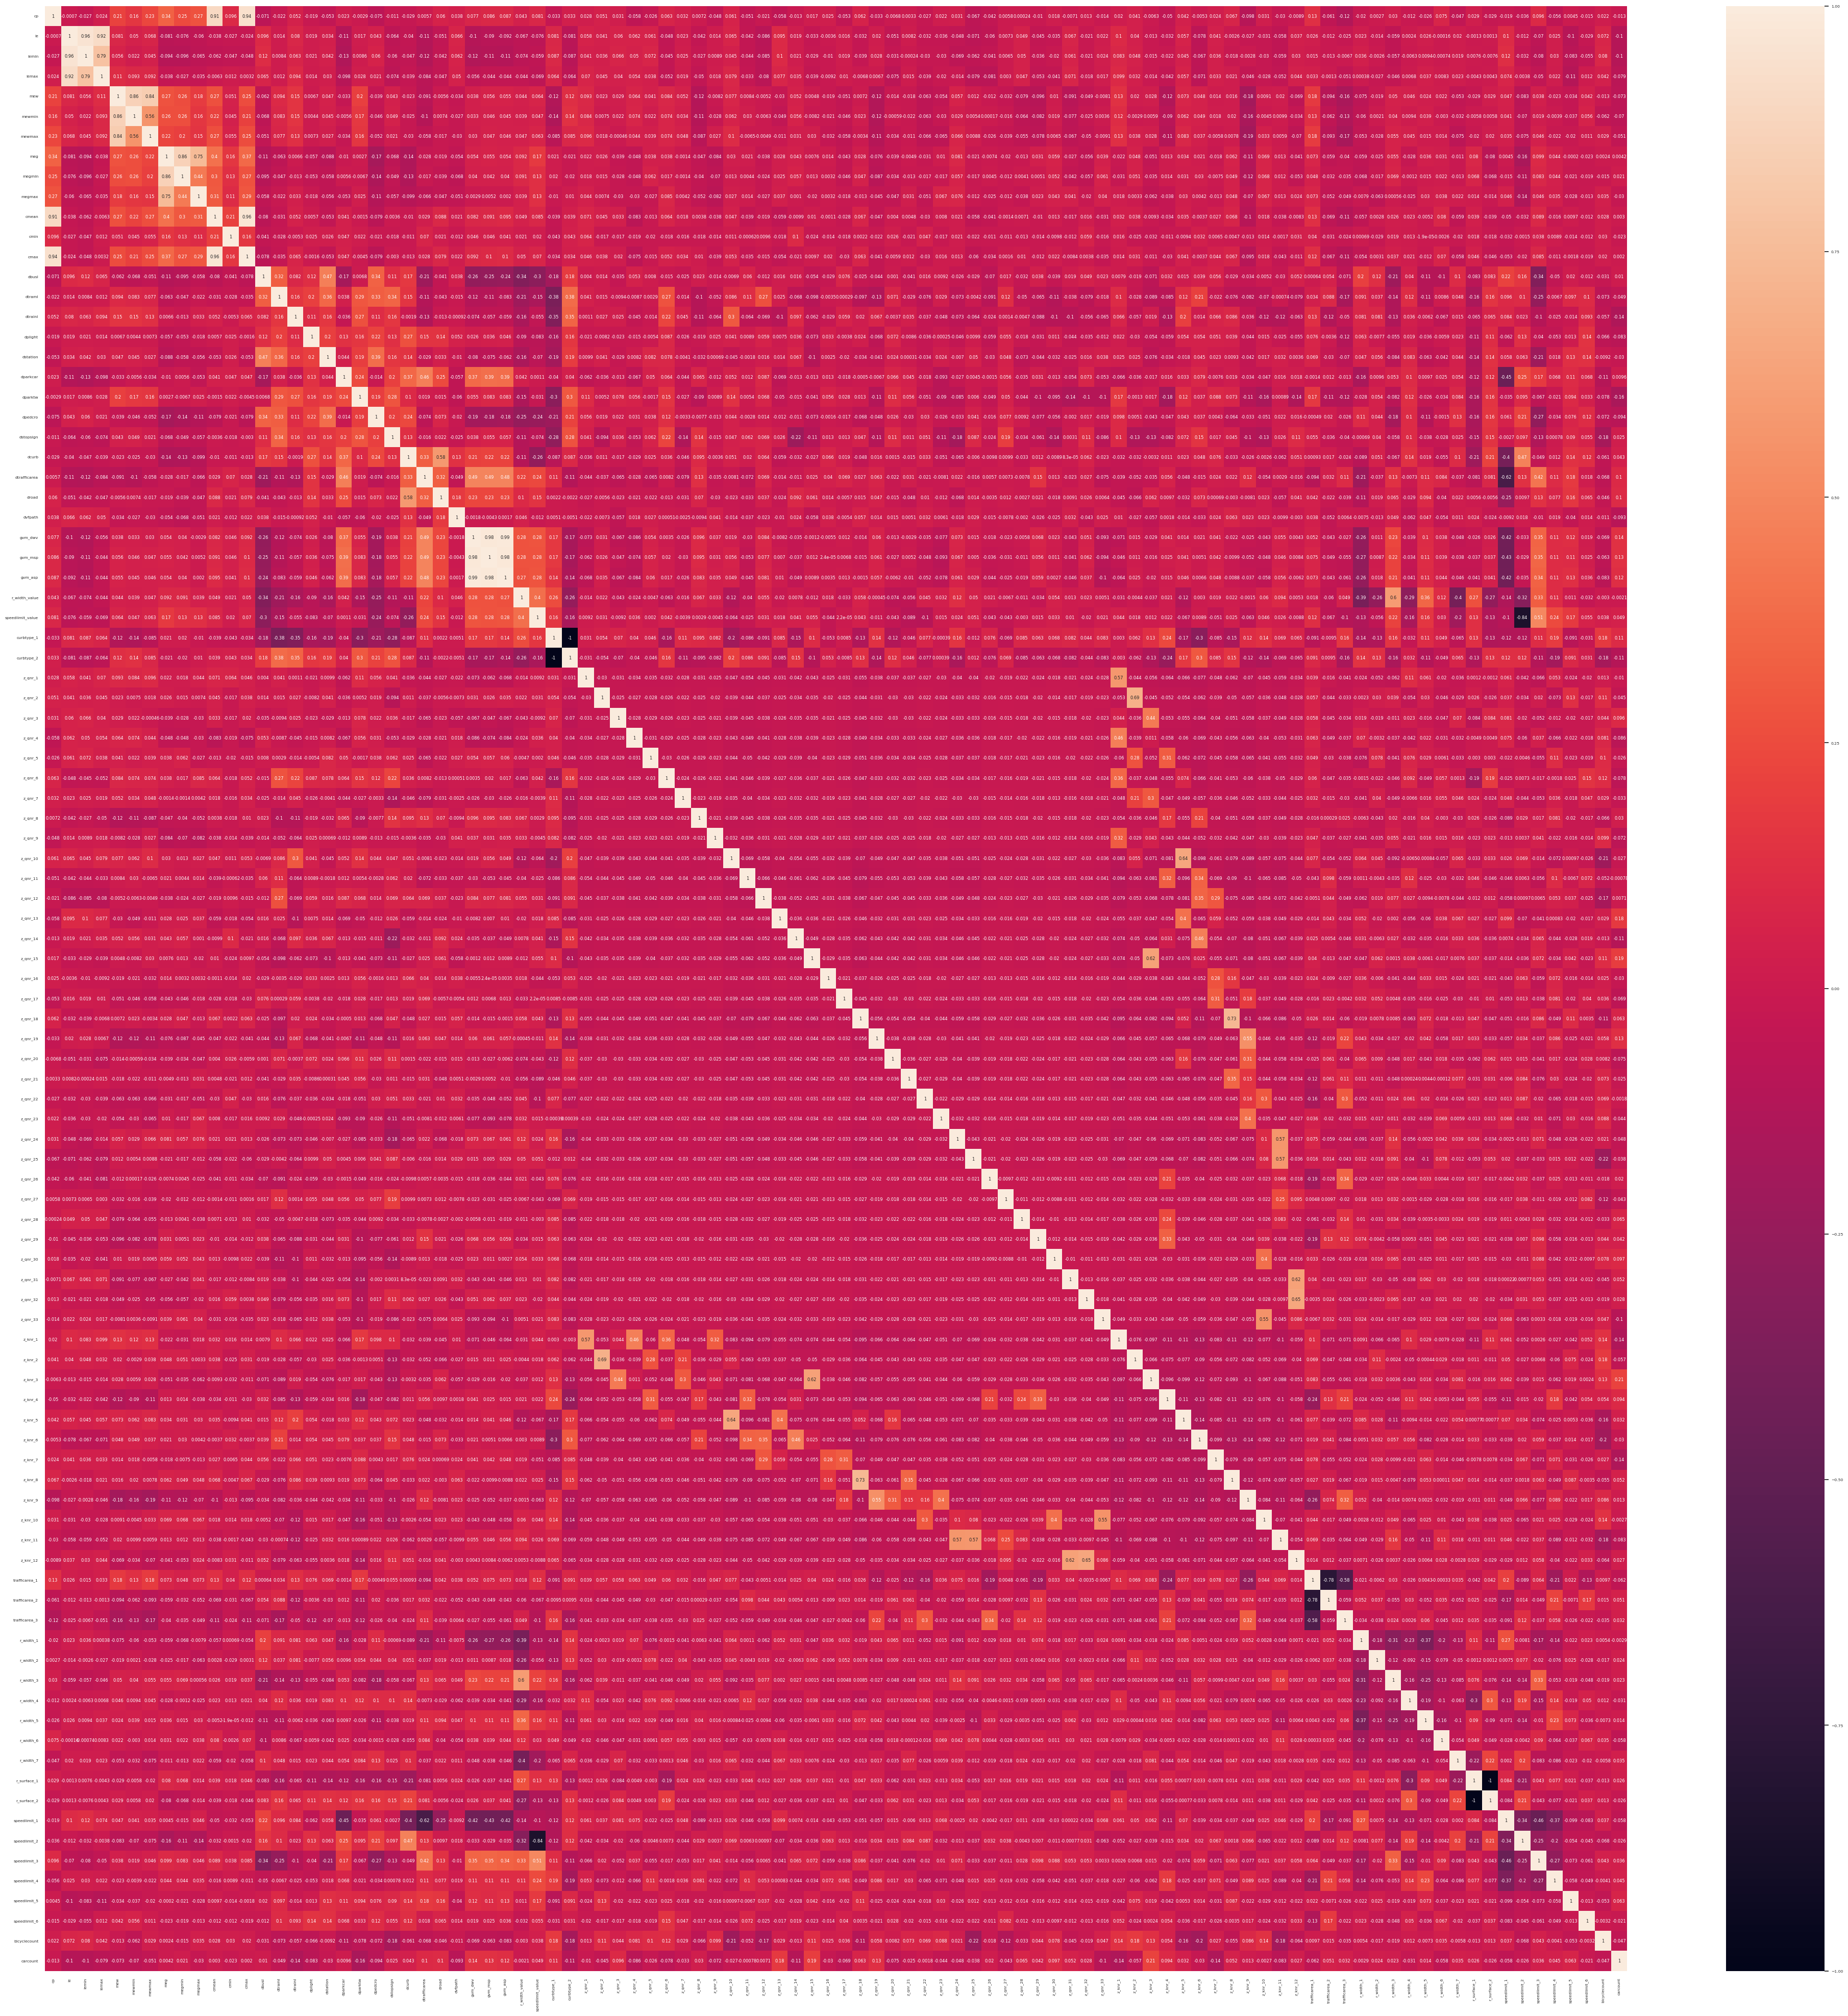

In [119]:

corr_matrix = dfv.corr()
plt.figure(figsize=(50,50))
sn.set(font_scale = 0.5)
sn.heatmap(corr_matrix, annot = True, )
# plt.savefig('fig_corrmat_ols.png')
plt.show()


